<a href="https://colab.research.google.com/github/M339KUMAR/ColabDemoFiles/blob/main/GCAF/Gradient_Descent_ML2AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Gradient Descent

Iteration 1: x = 0.6000, f(x) = 5.7600
Iteration 2: x = 1.0800, f(x) = 3.6864
Iteration 3: x = 1.4640, f(x) = 2.3593
Iteration 4: x = 1.7712, f(x) = 1.5099
Iteration 5: x = 2.0170, f(x) = 0.9664
Iteration 6: x = 2.2136, f(x) = 0.6185
Iteration 7: x = 2.3709, f(x) = 0.3958
Iteration 8: x = 2.4967, f(x) = 0.2533
Iteration 9: x = 2.5973, f(x) = 0.1621
Iteration 10: x = 2.6779, f(x) = 0.1038
Iteration 11: x = 2.7423, f(x) = 0.0664
Iteration 12: x = 2.7938, f(x) = 0.0425
Iteration 13: x = 2.8351, f(x) = 0.0272
Iteration 14: x = 2.8681, f(x) = 0.0174
Iteration 15: x = 2.8944, f(x) = 0.0111
Iteration 16: x = 2.9156, f(x) = 0.0071
Iteration 17: x = 2.9324, f(x) = 0.0046
Iteration 18: x = 2.9460, f(x) = 0.0029
Iteration 19: x = 2.9568, f(x) = 0.0019
Iteration 20: x = 2.9654, f(x) = 0.0012
Iteration 21: x = 2.9723, f(x) = 0.0008
Iteration 22: x = 2.9779, f(x) = 0.0005
Iteration 23: x = 2.9823, f(x) = 0.0003
Iteration 24: x = 2.9858, f(x) = 0.0002
Iteration 25: x = 2.9887, f(x) = 0.0001


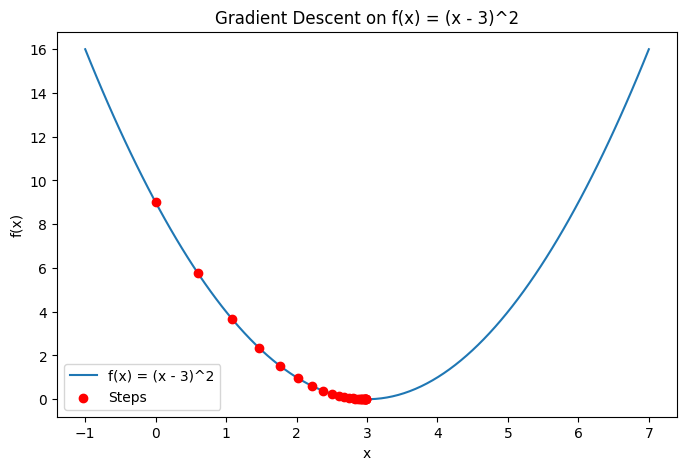

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    """Quadratic function f(x) = (x - 3)^2."""
    return (x - 3)**2

def df(x):
    """Derivative of f(x) with respect to x."""
    return 2 * (x - 3)

# Gradient descent parameters
learning_rate = 0.1   # Step size
num_iterations = 25   # Number of updates
x = 0                 # Starting point

# Lists to store the history for visualization
x_history = [x]
f_history = [f(x)]

# Perform gradient descent
for i in range(num_iterations):
    gradient = df(x)
    x = x - learning_rate * gradient  # Update rule: move opposite to the gradient
    x_history.append(x)
    f_history.append(f(x))
    print(f"Iteration {i+1}: x = {x:.4f}, f(x) = {f(x):.4f}")

# Visualization of the gradient descent steps
x_vals = np.linspace(-1, 7, 100)
y_vals = f(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label="f(x) = (x - 3)^2")         # Plot the function
plt.scatter(x_history, f_history, color='red', zorder=5, label="Steps")  # Plot descent steps
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent on f(x) = (x - 3)^2")
plt.legend()
plt.show()


## 2. Types of Gradient Descent

1. Batch Gradient Descent
2. Stochastic Gradient Descent
3. Mini-Batch Gradient Descent


### Step 1: Import Libraries and Generate Data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate 100 random points for one feature
X = 2 * np.random.rand(100, 1)
# Generate targets using y = 4 + 3x + noise
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a column of ones to X to account for the bias (intercept) term
X_b = np.c_[np.ones((100, 1)), X]  # Now X_b has shape (100, 2)


### Step 2: Define the Cost Function and Its Gradient
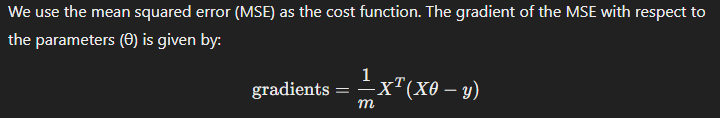


In [ ]:
def compute_cost(theta, X, y):
    """Compute the Mean Squared Error cost."""
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost


## Step 3: Implement the Three Variants of Gradient Descent


### A. Batch Gradient Descent


In [ ]:
def batch_gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)
    cost_history = []
    theta_history = []
    for i in range(n_iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost_history.append(compute_cost(theta, X, y))
        theta_history.append(theta.copy())
    return theta, cost_history, theta_history


### B. Stochastic Gradient Descent (SGD)


In [ ]:
def stochastic_gradient_descent(X, y, theta, learning_rate, n_epochs):
    m = len(y)
    cost_history = []
    theta_history = []
    for epoch in range(n_epochs):
        for i in range(m):
            # Pick a random index from the dataset
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
            cost_history.append(compute_cost(theta, X, y))
            theta_history.append(theta.copy())
    return theta, cost_history, theta_history


### C. Mini-Batch Gradient Descent


In [ ]:
def mini_batch_gradient_descent(X, y, theta, learning_rate, n_epochs, batch_size):
    m = len(y)
    cost_history = []
    theta_history = []
    for epoch in range(n_epochs):
        # Shuffle the dataset at the start of each epoch
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        # Process mini-batches
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = (1 / len(xi)) * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
            cost_history.append(compute_cost(theta, X, y))
            theta_history.append(theta.copy())
    return theta, cost_history, theta_history


## Step 4: Run the Algorithms and Plot the Results


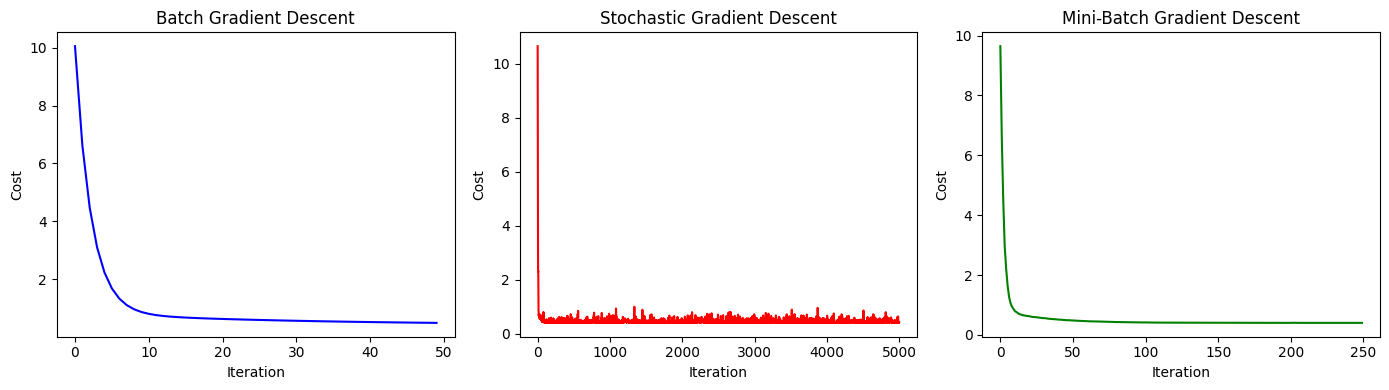

In [ ]:
# Parameters
n_iterations = 50          # For batch GD
n_epochs = 50              # For SGD and Mini-Batch GD
learning_rate = 0.1
batch_size = 20

# Initialize theta (random initialization for two parameters: intercept and slope)
theta_init = np.random.randn(2, 1)

# Run Batch Gradient Descent
theta_batch, cost_history_batch, theta_history_batch = batch_gradient_descent(
    X_b, y, theta_init.copy(), learning_rate, n_iterations)

# Run Stochastic Gradient Descent (SGD)
theta_sgd, cost_history_sgd, theta_history_sgd = stochastic_gradient_descent(
    X_b, y, theta_init.copy(), learning_rate, n_epochs)

# Run Mini-Batch Gradient Descent
theta_mb, cost_history_mb, theta_history_mb = mini_batch_gradient_descent(
    X_b, y, theta_init.copy(), learning_rate, n_epochs, batch_size)

# Plotting the cost histories for comparison
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.plot(cost_history_batch, 'b-')
plt.title("Batch Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.subplot(1, 3, 2)
plt.plot(cost_history_sgd, 'r-')
plt.title("Stochastic Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.subplot(1, 3, 3)
plt.plot(cost_history_mb, 'g-')
plt.title("Mini-Batch Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.tight_layout()
plt.show()


## Results Explained

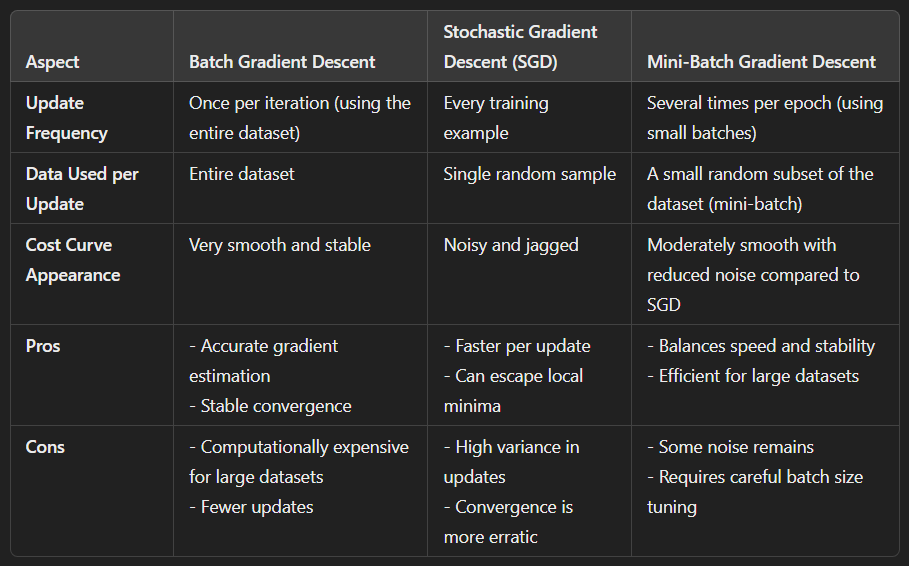

## Code for graph generation

In [ ]:
import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo

# Define the complex function to visualize
def complex_function(x, y):
    """
    Compute the function value for a given x and y.
    This function creates multiple local minima and maxima,
    which is useful for demonstrating optimization techniques.
    """
    return np.sin(3 * x) * np.cos(3 * y) + np.sin(y) * np.cos(x)

# Generate a high-resolution grid
x = np.linspace(-2, 2, 300)  # Increased number of points for higher resolution
y = np.linspace(-2, 2, 300)
X, Y = np.meshgrid(x, y)
Z = complex_function(X, Y)

# Create the 3D surface plot using Plotly
surface = go.Surface(
    x=X,
    y=Y,
    z=Z,
    colorscale='Jet',
    opacity=0.9,
    showscale=True,
    contours={
        "z": {"show": True, "usecolormap": True, "highlightcolor": "lime", "project": {"z": True}}
    }
)

# Define the layout for better clarity and dynamic interaction
layout = go.Layout(
    title='High-Quality Interactive 3D Surface Plot for Gradient Descent Visualization',
    scene=dict(
        xaxis=dict(
            title='X-axis',
            backgroundcolor="rgb(230, 230,230)",
            gridcolor="white",
            showbackground=True,
            zerolinecolor="white"
        ),
        yaxis=dict(
            title='Y-axis',
            backgroundcolor="rgb(230, 230,230)",
            gridcolor="white",
            showbackground=True,
            zerolinecolor="white"
        ),
        zaxis=dict(
            title='Z-axis',
            backgroundcolor="rgb(230, 230,230)",
            gridcolor="white",
            showbackground=True,
            zerolinecolor="white"
        )
    ),
    width=900,  # Larger width for a bigger plot
    height=900,  # Larger height for a bigger plot
)

# Create the figure and plot it
fig = go.Figure(data=[surface], layout=layout)
pyo.plot(fig, filename='interactive_3d_surface_plot.html')


'interactive_3d_surface_plot.html'